In [1]:
from IPython.display import Image
import ee
import shapefile
import numpy as np
ee.Initialize()

In [2]:
root='sb_modis_Lai_2005_18/'
f=open(root+'names_all.csv','r')
lines =f.read()
names=lines.split('\n')
f.close()
print(len(names))

1279


In [3]:
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np


In [20]:
qcs=[]
lai=[]
fapr=[]
qc_names=[]
for name in names:
    if len(name)==0:
        break
    _name=name#+'.Nadir_Reflectance'
    blue=Image.open(root+_name+'.Fpar.tif')
    blue=np.array(blue,dtype=np.uint8)
    green=Image.open(root+_name+'.Lai.tif')
    green=np.array(green,dtype=np.uint8)
    red=Image.open(root+_name+'.FparLai_QC.tif')
    red=np.array(red,dtype=np.uint8)
    #blue=blue*0
    sp=red.shape
    mask=np.ones((sp[0],sp[1]),dtype=np.uint8)
    mask=mask*24
    red=np.bitwise_and(red,mask)
    blue[green>100]=0
    green[green>100]=0

    
    dt=name.split('_')
    month=dt[1]
    #if int(month)>=3 and int(month)<=10:
    #    continue
    qc=np.mean(red)
    #if qc>15:
    #    continue
    qcs.append(qc)
    lai.append(np.mean(green))
    fapr.append(np.mean(blue))
    qc_names.append(name)
    img=np.zeros((sp[0],sp[1],3),dtype=np.uint8)
    red=red*0
    blue=blue*0
    #red[green>248]=255
    img[:,:,0]=np.uint8(blue)
    img[:,:,1]=np.uint8(green*2.5)
    img[:,:,2]=np.uint8(red)
    img[img<-500]=0
    #img=np.uint8(img*255)
    #plt.imshow(img)
    #plt.show()
    img=cv2.resize(img,(10,10))
    cv2.imwrite(root+'res_10x10/'+name+'.jpg',img)
    print(name,names.index(name))
    print(np.max(img))
    print(np.shape(img))
#print('mean_qc',np.mean(qcs))

2005_01_01 0
112
(10, 10, 3)
2005_01_05 1
108
(10, 10, 3)
2005_01_09 2
127
(10, 10, 3)
2005_01_13 3
95
(10, 10, 3)
2005_01_17 4
127
(10, 10, 3)
2005_01_21 5
162
(10, 10, 3)
2005_01_25 6
131
(10, 10, 3)
2005_01_29 7
125
(10, 10, 3)
2005_02_02 8
142
(10, 10, 3)
2005_02_06 9
122
(10, 10, 3)
2005_02_10 10
118
(10, 10, 3)
2005_02_14 11
125
(10, 10, 3)
2005_02_18 12
137
(10, 10, 3)
2005_02_22 13
135
(10, 10, 3)
2005_02_26 14
137
(10, 10, 3)
2005_03_02 15
130
(10, 10, 3)
2005_03_06 16
130
(10, 10, 3)
2005_03_10 17
127
(10, 10, 3)
2005_03_14 18
155
(10, 10, 3)
2005_03_18 19
137
(10, 10, 3)
2005_03_22 20
122
(10, 10, 3)
2005_03_26 21
130
(10, 10, 3)
2005_03_30 22
153
(10, 10, 3)
2005_04_03 23
97
(10, 10, 3)
2005_04_07 24
155
(10, 10, 3)
2005_04_11 25
140
(10, 10, 3)
2005_04_15 26
120
(10, 10, 3)
2005_04_19 27
125
(10, 10, 3)
2005_04_23 28
147
(10, 10, 3)
2005_04_27 29
137
(10, 10, 3)
2005_05_01 30
147
(10, 10, 3)
2005_05_05 31
142
(10, 10, 3)
2005_05_09 32
140
(10, 10, 3)
2005_05_13 33
130
(10,

2007_12_19 272
140
(10, 10, 3)
2007_12_23 273
115
(10, 10, 3)
2007_12_27 274
100
(10, 10, 3)
2007_12_31 275
163
(10, 10, 3)
2008_01_01 276
175
(10, 10, 3)
2008_01_05 277
102
(10, 10, 3)
2008_01_09 278
112
(10, 10, 3)
2008_01_13 279
102
(10, 10, 3)
2008_01_17 280
116
(10, 10, 3)
2008_01_21 281
102
(10, 10, 3)
2008_01_25 282
134
(10, 10, 3)
2008_01_29 283
102
(10, 10, 3)
2008_02_02 284
100
(10, 10, 3)
2008_02_06 285
73
(10, 10, 3)
2008_02_10 286
109
(10, 10, 3)
2008_02_14 287
117
(10, 10, 3)
2008_02_18 288
115
(10, 10, 3)
2008_02_22 289
117
(10, 10, 3)
2008_02_26 290
117
(10, 10, 3)
2008_03_01 291
76
(10, 10, 3)
2008_03_05 292
137
(10, 10, 3)
2008_03_09 293
142
(10, 10, 3)
2008_03_13 294
152
(10, 10, 3)
2008_03_17 295
120
(10, 10, 3)
2008_03_21 296
111
(10, 10, 3)
2008_03_25 297
165
(10, 10, 3)
2008_03_29 298
134
(10, 10, 3)
2008_04_02 299
157
(10, 10, 3)
2008_04_06 300
162
(10, 10, 3)
2008_04_10 301
125
(10, 10, 3)
2008_04_14 302
165
(10, 10, 3)
2008_04_18 303
120
(10, 10, 3)
2008_04_22

2010_11_17 540
167
(10, 10, 3)
2010_11_21 541
145
(10, 10, 3)
2010_11_25 542
142
(10, 10, 3)
2010_11_29 543
140
(10, 10, 3)
2010_12_03 544
146
(10, 10, 3)
2010_12_07 545
150
(10, 10, 3)
2010_12_11 546
122
(10, 10, 3)
2010_12_15 547
175
(10, 10, 3)
2010_12_19 548
135
(10, 10, 3)
2010_12_23 549
143
(10, 10, 3)
2010_12_27 550
140
(10, 10, 3)
2010_12_31 551
103
(10, 10, 3)
2011_01_01 552
117
(10, 10, 3)
2011_01_05 553
125
(10, 10, 3)
2011_01_09 554
134
(10, 10, 3)
2011_01_13 555
175
(10, 10, 3)
2011_01_17 556
135
(10, 10, 3)
2011_01_21 557
120
(10, 10, 3)
2011_01_25 558
107
(10, 10, 3)
2011_01_29 559
145
(10, 10, 3)
2011_02_02 560
110
(10, 10, 3)
2011_02_06 561
112
(10, 10, 3)
2011_02_10 562
126
(10, 10, 3)
2011_02_14 563
145
(10, 10, 3)
2011_02_18 564
125
(10, 10, 3)
2011_02_22 565
137
(10, 10, 3)
2011_02_26 566
140
(10, 10, 3)
2011_03_02 567
132
(10, 10, 3)
2011_03_06 568
137
(10, 10, 3)
2011_03_10 569
140
(10, 10, 3)
2011_03_14 570
145
(10, 10, 3)
2011_03_18 571
125
(10, 10, 3)
2011_03_

2013_10_20 809
150
(10, 10, 3)
2013_10_24 810
105
(10, 10, 3)
2013_10_28 811
155
(10, 10, 3)
2013_11_01 812
167
(10, 10, 3)
2013_11_05 813
150
(10, 10, 3)
2013_11_09 814
150
(10, 10, 3)
2013_11_13 815
150
(10, 10, 3)
2013_11_17 816
150
(10, 10, 3)
2013_11_21 817
147
(10, 10, 3)
2013_11_25 818
158
(10, 10, 3)
2013_11_29 819
171
(10, 10, 3)
2013_12_03 820
145
(10, 10, 3)
2013_12_07 821
115
(10, 10, 3)
2013_12_11 822
142
(10, 10, 3)
2013_12_15 823
150
(10, 10, 3)
2013_12_19 824
150
(10, 10, 3)
2013_12_23 825
135
(10, 10, 3)
2013_12_27 826
142
(10, 10, 3)
2013_12_31 827
174
(10, 10, 3)
2014_01_01 828
130
(10, 10, 3)
2014_01_05 829
125
(10, 10, 3)
2014_01_09 830
132
(10, 10, 3)
2014_01_13 831
107
(10, 10, 3)
2014_01_17 832
135
(10, 10, 3)
2014_01_21 833
130
(10, 10, 3)
2014_01_25 834
127
(10, 10, 3)
2014_01_29 835
109
(10, 10, 3)
2014_02_02 836
130
(10, 10, 3)
2014_02_06 837
142
(10, 10, 3)
2014_02_10 838
127
(10, 10, 3)
2014_02_14 839
125
(10, 10, 3)
2014_02_18 840
133
(10, 10, 3)
2014_02_

2016_09_21 1077
165
(10, 10, 3)
2016_09_25 1078
147
(10, 10, 3)
2016_09_29 1079
167
(10, 10, 3)
2016_10_03 1080
130
(10, 10, 3)
2016_10_07 1081
125
(10, 10, 3)
2016_10_11 1082
114
(10, 10, 3)
2016_10_15 1083
160
(10, 10, 3)
2016_10_19 1084
167
(10, 10, 3)
2016_10_23 1085
150
(10, 10, 3)
2016_10_27 1086
173
(10, 10, 3)
2016_10_31 1087
148
(10, 10, 3)
2016_11_04 1088
142
(10, 10, 3)
2016_11_08 1089
169
(10, 10, 3)
2016_11_12 1090
136
(10, 10, 3)
2016_11_16 1091
140
(10, 10, 3)
2016_11_20 1092
150
(10, 10, 3)
2016_11_24 1093
145
(10, 10, 3)
2016_11_28 1094
132
(10, 10, 3)
2016_12_02 1095
140
(10, 10, 3)
2016_12_06 1096
155
(10, 10, 3)
2016_12_10 1097
147
(10, 10, 3)
2016_12_14 1098
172
(10, 10, 3)
2016_12_18 1099
148
(10, 10, 3)
2016_12_22 1100
82
(10, 10, 3)
2016_12_26 1101
122
(10, 10, 3)
2016_12_30 1102
125
(10, 10, 3)
2017_01_01 1103
140
(10, 10, 3)
2017_01_05 1104
142
(10, 10, 3)
2017_01_09 1105
122
(10, 10, 3)
2017_01_13 1106
122
(10, 10, 3)
2017_01_17 1107
137
(10, 10, 3)
2017_01_2

In [21]:
#import os
#os.mkdir(root+'res_10x10')

In [74]:
data={}
for qc_name in qc_names:
    print(qc_name)
    fname=root+'res_10x10/'+qc_name+'.jpg'
    img=cv2.imread(fname)
    im=cv2.resize(img[:,:,1],(100,1))
    data[qc_name]=np.array(im[0])

2005_01_01
2005_01_05
2005_01_09
2005_01_13
2005_01_17
2005_01_21
2005_01_25
2005_01_29
2005_02_02
2005_02_06
2005_02_10
2005_02_14
2005_02_18
2005_02_22
2005_02_26
2005_03_02
2005_03_06
2005_03_10
2005_03_14
2005_03_18
2005_03_22
2005_03_26
2005_03_30
2005_04_03
2005_04_07
2005_04_11
2005_04_15
2005_04_19
2005_04_23
2005_04_27
2005_05_01
2005_05_05
2005_05_09
2005_05_13
2005_05_17
2005_05_21
2005_05_25
2005_05_29
2005_06_02
2005_06_06
2005_06_10
2005_06_14
2005_06_18
2005_06_22
2005_06_26
2005_06_30
2005_07_04
2005_07_08
2005_07_12
2005_07_16
2005_07_20
2005_07_24
2005_07_28
2005_08_01
2005_08_05
2005_08_09
2005_08_13
2005_08_17
2005_08_21
2005_08_25
2005_08_29
2005_09_02
2005_09_06
2005_09_10
2005_09_14
2005_09_18
2005_09_22
2005_09_26
2005_09_30
2005_10_04
2005_10_08
2005_10_12
2005_10_16
2005_10_20
2005_10_24
2005_10_28
2005_11_01
2005_11_05
2005_11_09
2005_11_13
2005_11_17
2005_11_21
2005_11_25
2005_11_29
2005_12_03
2005_12_07
2005_12_11
2005_12_15
2005_12_19
2005_12_23
2005_12_27

2015_09_06
2015_09_10
2015_09_14
2015_09_18
2015_09_22
2015_09_26
2015_09_30
2015_10_04
2015_10_08
2015_10_12
2015_10_16
2015_10_20
2015_10_24
2015_10_28
2015_11_01
2015_11_05
2015_11_09
2015_11_13
2015_11_17
2015_11_21
2015_11_25
2015_11_29
2015_12_03
2015_12_07
2015_12_11
2015_12_15
2015_12_19
2015_12_23
2015_12_27
2015_12_31
2016_01_01
2016_01_05
2016_01_09
2016_01_13
2016_01_17
2016_01_21
2016_01_25
2016_01_29
2016_02_02
2016_02_06
2016_02_10
2016_02_14
2016_02_18
2016_02_26
2016_03_01
2016_03_05
2016_03_09
2016_03_13
2016_03_17
2016_03_21
2016_03_25
2016_03_29
2016_04_02
2016_04_06
2016_04_10
2016_04_14
2016_04_18
2016_04_22
2016_04_26
2016_04_30
2016_05_04
2016_05_08
2016_05_12
2016_05_16
2016_05_20
2016_05_24
2016_05_28
2016_06_01
2016_06_05
2016_06_09
2016_06_13
2016_06_17
2016_06_21
2016_06_25
2016_06_29
2016_07_03
2016_07_07
2016_07_11
2016_07_15
2016_07_19
2016_07_23
2016_07_27
2016_07_31
2016_08_04
2016_08_08
2016_08_12
2016_08_16
2016_08_20
2016_08_24
2016_08_28
2016_09_01

In [83]:
df=pd.DataFrame(data)
df.transpose()
df.to_csv('10x10.csv')
df

,2005_01_01,2005_01_05,2005_01_09,2005_01_13,2005_01_17,2005_01_21,2005_01_25,2005_01_29,2005_02_02,2005_02_06,...,2018_10_24,2018_10_28,2018_11_01,2018_11_05,2018_11_09,2018_11_13,2018_11_17,2018_11_21,2018_11_25,2018_11_29
0,0,0,1,1,0,1,1,1,0,1,...,1,3,2,3,0,1,0,2,3,3
1,0,0,1,1,0,1,1,1,0,1,...,1,3,2,3,0,1,0,2,3,3
2,0,0,1,1,0,1,1,1,0,1,...,1,3,2,3,0,1,0,2,3,3
3,0,0,1,1,0,1,1,1,0,1,...,1,3,2,3,0,1,0,2,3,3
4,0,0,1,1,0,1,1,1,0,1,...,1,3,2,3,0,1,0,2,3,3
5,0,0,1,1,0,1,1,1,0,1,...,1,2,2,3,0,1,0,2,2,3
6,0,0,1,1,0,1,1,1,0,1,...,1,2,2,3,0,1,0,2,2,3
7,1,0,2,1,0,1,2,1,1,1,...,1,2,2,4,1,1,1,3,2,4
8,1,0,2,1,0,1,2,1,1,1,...,1,2,2,4,1,1,1,3,2,4
9,1,0,2,1,0,2,2,1,1,2,...,1,2,2,5,1,1,1,3,2,4


In [88]:
df=pd.read_csv('10x10.csv',index_col=0)
df.values.shape

(100, 1278)

In [11]:
import datetime
times=[]
n_times=[]
for name in qc_names:
    if len(name)==0:
        break
    dt=name.split('_')
    time=datetime.datetime(int(dt[0]),int(dt[1]),int(dt[2]))
    times.append(time)
    
    dtt=int(int(dt[0])%2000)+(int(dt[1])/100)+(int(dt[2])/10000)
    dtt=int(dtt*10000)
    #dtt=np.around(dtt,decimals=4)
    n_times.append(dtt)
    #print(time,dtt)
print(n_times)

[50100, 50104, 50108, 50112, 50116, 50121, 50125, 50129, 50202, 50206, 50210, 50214, 50218, 50222, 50226, 51101, 51105, 51109, 51113, 51117, 51121, 51125, 51129, 51203, 51207, 51211, 51215, 51219, 51223, 51227, 51231, 60100, 60104, 60108, 60112, 60116, 60121, 60125, 60129, 60202, 60206, 60210, 60214, 60218, 60222, 60226, 61101, 61105, 61109, 61113, 61117, 61121, 61125, 61129, 61203, 61207, 61211, 61215, 61219, 61223, 61227, 61231, 70101, 70105, 70109, 70113, 70117, 70121, 70125, 70129, 70202, 70206, 70210, 70214, 70218, 70222, 70226, 71101, 71105, 71109, 71113, 71117, 71121, 71125, 71129, 71203, 71207, 71211, 71215, 71219, 71223, 71227, 71231, 80101, 80105, 80109, 80113, 80117, 80121, 80125, 80129, 80201, 80206, 80209, 80214, 80217, 80222, 80225, 81104, 81108, 81112, 81115, 81120, 81123, 81128, 81201, 81206, 81209, 81214, 81217, 81222, 81225, 81230, 90101, 90105, 90109, 90113, 90117, 90121, 90125, 90129, 90201, 90206, 90209, 90214, 90217, 90222, 90225, 91100, 91105, 91108, 91113, 91116

In [12]:
print(len(qcs))

422


In [13]:
import pickle
import pandas as pd
n_times=np.array(range(0,len(qcs)))
df=pd.DataFrame([],index=times)
df['qc']=qcs
df['Lai']=lai
df['Fapr']=fapr
#pickle_out = open("df_mean_sb.pickle","wb")
#pickle.dump(df, pickle_out)
#pickle_out.close()


In [13]:
import pickle
import pandas as pd
from matplotlib import pyplot as plt
pickle_out = open("df_mean_sb.pickle","rb")
df=pickle.load(pickle_out)
pickle_out.close()

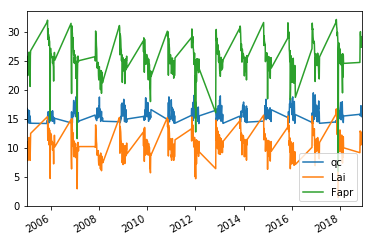

In [15]:
#df['qc']=qc_names

#df=df.rolling(window=50).mean()


df.plot()
df.to_csv(root+'lai_fpar_all.csv',sep=',')
#print(df[:100])